# National Numbers
A notebook to look at national numbers

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
try:
    # read directly from NYT's github repo for the freshest data
    states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
except:
    # unless it's not available in which case read locally after pulling the repo from upstream
    # (assumes you've added the NYT repo as upstream with 
    #     $ remote add upstream https://github.com/nytimes/covid-19-data.git)
    !git pull upstream master
    states = pd.read_csv('us-states.csv')

In [39]:
national = states.groupby('date')[['cases','deaths']].sum()
national.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


In [40]:
# add a row with 0 cases at the top
national = pd.concat([pd.DataFrame([{'date': '2020-01-20', 'cases': 0, 'deaths': 0}]),national.reset_index()],ignore_index=True)

In [41]:
# compute new cases and deaths
national['new_cases'] = national['cases'] - national['cases'].shift(1)
national['new_deaths'] = national['deaths'] - national['deaths'].shift(1)
national.fillna(0,inplace=True)
national.set_index('date',inplace=True)
national.head()

,cases,deaths,new_cases,new_deaths
date,,,,
2020-01-20,0,0,0.0,0.0
2020-01-21,1,0,1.0,0.0
2020-01-22,1,0,0.0,0.0
2020-01-23,1,0,0.0,0.0
2020-01-24,2,0,1.0,0.0


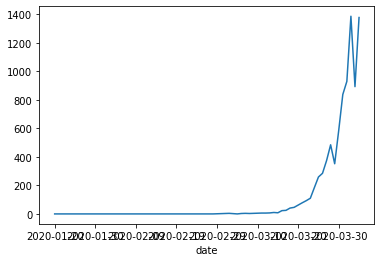

In [42]:
national.new_deaths.plot()

In [44]:
def doubling_rate(y):
    b,lna = np.polyfit(range(0,len(y)), np.log(y), 1)
    return np.log(2)/b

In [45]:
doubling_rate(national.deaths[-14:])

3.0071612713174796

In [46]:
doubling_rate(national.new_deaths[-14:])

3.443627142704413

In [47]:
doubling_rate(national.cases[-14:])

4.119309569239709

In [61]:
doubling_rate(national.deaths[-3:])

4.459068623701354

In [72]:
y = national.deaths[-14:]
b,lna = np.polyfit(range(0,len(y)), np.log(y), 1)
x=range(0,14)
y_pred = np.exp(lna)*np.exp(b*x)

In [98]:
pred=pd.DataFrame(y.index)
pred['y_pred'] = y_pred
pred.set_index('date',inplace=True)
tmp = national.join(pred,how='left')
tmp = tmp.loc[tmp.deaths>=1]

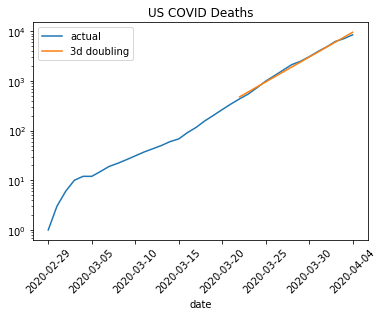

In [217]:
tmp.deaths.plot(logy=True,title='US COVID Deaths',figsize=(6,4),label='actual',legend=True)
tmp.y_pred.plot(label='3d doubling',legend=True)
plt.xticks(rotation=45);